In [2]:
# Import numpy and matplotlib
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import xarray as xr

# Some early examples of applications of stochastic transport modelling


In notebook 9, we talked about Brownian motion, and Langevin's (1908) description in terms of Newton's second law with a random force. This was one of the earliest examples of what we would now call a stochastic differential equation. A lot of mathematical development and analytical work was done over the next 40 years or so, but it was with the invention of the computer that practical application of stochastic transport models really took off.


## Invention of the Monte Carlo method

The first application of the Monte Carlo method was to model transport and reactions of neutrons inside a nuclear weapon. This was the first application of ENIAC, the first general purpose electronic computer, completed in 1945.

Essay by Nicholas Metropolis (of the Metropolis algorithm), on the invention of the Monte Carlo method
https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-UR-88-9067

Essay by Roger Eckhardt on the invention of the Monte Carlo method
https://edisciplinas.usp.br/pluginfile.php/4946238/mod_folder/content/0/Eckhardt_LAS_1987.pdf

History of the Monte Carlo method on Wikipedia
https://en.wikipedia.org/wiki/Monte_Carlo_method#History

https://en.wikipedia.org/wiki/ENIAC

## Lagrangian stochastic transport models for the ocean

The earliest work I am aware of on stochastic transport modelling in the ocean is on oil spills, from the early 70s:

<div style="width:100%;align:center;text-align:center">
<img src="fig/monte_carlo_and_oil_1.png" alt="Drawing" style="width: 750px;" />
    
    
    ----------------------------------------
    ----------------------------------------
    
    
    
<img src="fig/monte_carlo_and_oil_2.png" alt="Drawing" style="width: 750px;"/>
</div>

# At present, stochastic Lagrangian particle transport is widely used

Below are some examples of different applications, with examples of publications. There are huge numbers of publications, and the list is not meant to be exhaustive or authoritative


## Oceanic applications

In oceanic applications, the most common approach is to solve the SDE for advection-diffusion:

$$ \mathrm{d}\mathbf{X} = \big( \mathbf{v}_b + \mathbf{v}(\mathbf{X}, t) + \nabla \mathbf{K}(\mathbf{X}, t)\big) \mathrm{d} t + \sqrt{2 \mathbf{K}(\mathbf{X}, t)} \, \mathrm{d},W$$

where $\mathbf{v}_b$ is the terminal velocity of a particle due to buoyancy, $\mathbf{v}(\mathbf{X}, t)$ is the velocity of the ocean currents (and optionally with wind and wave contributions), and $\mathbf{K}(\mathbf{X}, t)$ is the eddy diffusivitiy. Typically $\mathbf{v}(\mathbf{X}, t)$ and $\mathbf{K}(\mathbf{X}, t)$ are general and come from an ocean model, while $\mathbf{v}_b$ depends on the application. Note that we here assume that $\mathbf{K} = [K_x, K_y, K_z]$, for the more general case where $\mathbf{K}$ is a tensor with off-diagonal elements, see for example https://link.springer.com/article/10.1007/s10236-007-0102-9

Common to all of these applications is that they depend very much on the accuracy of the input data, meaning that for the most part, the accuracy depends on the input velocity field $\mathbf{v}(\mathbf{X}, t)$ and perhaps to a lesser degree on $\mathbf{K}(\mathbf{X}, t)$, while the numerical accuracy of the SDE solver is rarely the main problem.

### Example of accessing ocean data

Below is shown an example of how to access ocean data from MET Norway

In [8]:
d = xr.open_dataset('https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2023112500.nc')

d

<xarray.Dataset>
Dimensions:                  (s_rho: 35, s_w: 36, X: 2602, Y: 902, depth: 16,
                              time: 24)
Coordinates:
  * X                        (X) float64 0.0 800.0 ... 2.08e+06 2.081e+06
  * Y                        (Y) float64 0.0 800.0 1.6e+03 ... 7.2e+05 7.208e+05
  * depth                    (depth) float64 0.0 3.0 10.0 ... 1e+03 2e+03 3e+03
  * time                     (time) datetime64[ns] 2023-11-25 ... 2023-11-25T...
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/21)
    Cs_r                     (s_rho) float64 ...
    Cs_w                     (s_w) float64 ...
    forecast_reference_time  datetime64[ns] ...
    hc                       float64 ...
    projection_stere         int32 ...
    AKs                      (time, depth, Y, X) float32 ...
    ...                       ...
    ubar                     (time, Y, X) float32 ...
    v                        (time, depth, Y, X) float32 ...
    v_northward              (time, depth, Y, X) float32 ...
    vbar                     (time, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/60)
    file:                            /home/metno_op/run/norkyst-800m_2017/oce...
    type:                            ROMS/TOMS history file
    title:                           NorKyst-800m - ROMS
    var_info:                        /home/metno_op/sea/ROMS/metroms_apps/nor...
    rst_file:                        /home/metno_op/run/norkyst-800m_2017/oce...
    his_file:                        /home/metno_op/run/norkyst-800m_2017/oce...
    ...                              ...
    publisher_institution:           Norwegian Meteorological Institute
    publisher_email:                 adc-support@met.no
    publisher_url:                   https://adc.met.no/
    project:                         Ocean and Ice - Research to Operation (H...
    license:                         https://spdx.org/licenses/CC-BY-4.0.html...
    DODS_EXTRA.Unlimited_Dimension:  time

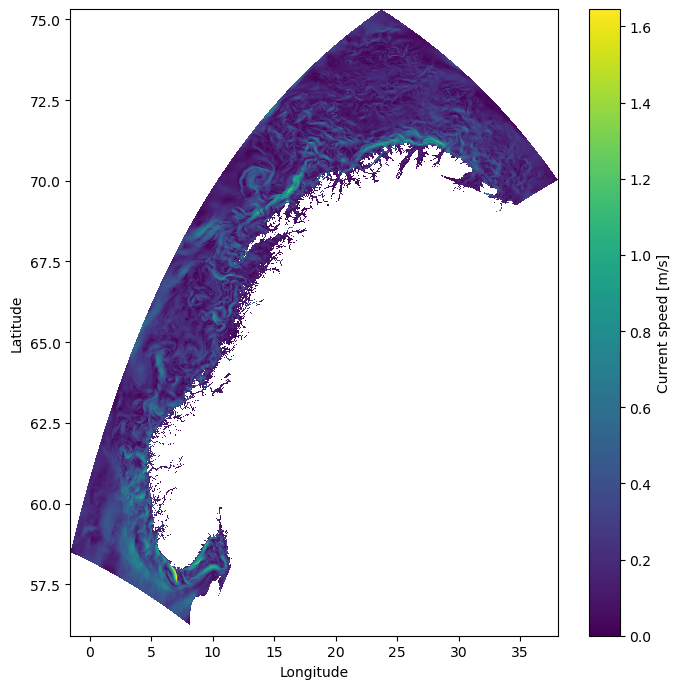

In [13]:
speed = np.sqrt(d.u[0,0,:,:]**2 + d.v[0,0,:,:]**2)

fig = plt.figure(figsize=(7,7))
plt.pcolormesh(d.lon, d.lat, speed, shading='auto')
plt.colorbar(label='Current speed [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

## Examples of oceanic applications of stochastic transport modelling


### Oil spills

Lagrangian stochastic oil spill modelling has long traditions, dating back to the 70s (see example above). Both commercial and open source models exist, and new models are being introduced all the time. Research and development is typically not so focused on the pure stochastic transport part (https://doi.org/10.1016/j.marpolbul.2019.07.002), but more on other processes and practical challenges, such as
* Oil chemistry
* Toxicity (https://doi.org/10.1038/s41598-021-87932-2)
* Biodegradation of organic compounds in oil (https://doi.org/10.1016/j.chemosphere.2020.126836 )
* Interaction with shoreline
* Interaction with ice (https://doi.org/10.1016/j.marpolbul.2019.01.019)


### Plastics
A large and rapidly growing body of work exists on transport modelling of plastics in the ocean. Research is ongoing on topics such as accumulation regions on the shore, shoreline interaction (deposition rates, fragmentation into microplastics), and how to represent diverse shapes, sizes and densities in a model in a reasonable manner. Particularly the University of Utrecht has a large an active group working on this topic (https://oceanparcels.org/index.html) but also in many other places, including several institutions in Norway.


### Mining waste 

Modelling of mining waste (mine tailings) is relevant in cases where the tailings are deposited into the ocean, which happens in some locations is Norway. An example is the current case surrounding Førdefjorden, where Lagrangian transport modelling wase one (of many) tools used to assess the environmental impact before permission was given. Examples of ongoing research include how to account for the fact that high concentration of mineral particles effectively makes the water denser, and how to account for the effects of flocculation (also called coagulation, see notebook 10).


### Plankton

For some reason, the plankton/biological modelling community seems to have been relatively competent mathematically, and has produced some very readable papers on somewhat subtle issues much earlier than for example the oil spill modelling community.
* The importance of including the derivative of the diffusivity (https://doi.org/10.3354/meps158275)
* Backtracking in Lagrangian models (https://doi.org/10.1016/j.jmarsys.2011.03.009)


###  Radioactive tracers

Relatively easy to model, as they tend to move passively (no settling or rising), and also possible to measure at quite low concentrations. Modelling has been applied for example to the Fukushima accident:
* https://doi.org/10.5194/bg-10-4973-2013
* https://os.copernicus.org/articles/13/453/2017/


### Search and rescue

Lagrangian models are also used to inform searches for missing persons or drifting boats. Challenges include estimating the degree to which the drifting object is influenced by the wind, which depends on e.g. shape and density.
* https://doi.org/10.1016/j.jmarsys.2007.02.010
* https://doi.org/10.1080/1755876X.2021.1911485

## Open source models for oceanic applications

A large number of frameworks exist, and "new" models are being introduced frequently. Some examples of open source frameworks are

### OceanParcels (or just Parcels)
Developed mainly at Utrech University in the Netherlands. Widely used for plastics transport modelling, but can also be used more generally. Written in Python, with some use of compiled code.
* https://oceanparcels.org/
* https://github.com/OceanParcels/parcels

### OpenDrift
Developed by the Norwegian Meteorological Institute, and used operationally by authorities in Norway for responding to events such as drifting ships, search and rescue, and oil spills. Can also be used more generally. Written in Python.
* https://opendrift.github.io/
* https://github.com/OpenDrift/opendrift


### MOHID Lagrangian
Seems focused on tracers. Written in Fortran, with collection of python scripts for post processing.
* http://www.mohid.com/pages/models/mohidlagrangian/mohid_lagrangian_home.shtml
* https://github.com/Mohid-Water-Modelling-System/MOHID-Lagrangian


## Atmospheric applications

I know less about this, as this is not my field. In principle very similar to oceanic modelling, in that the velocity field is typically provided as input, from an atmosphere model. Due to the difference in scales between the ocean and the atmosphere different parameterisations are used for the diffusivity (atmosphere is less dense and less viscous, therefore eddies tend to be larger). It is my impression that random flight is more commonly used than random walk.

* https://link.springer.com/article/10.1007/BF00122492
* https://link.springer.com/article/10.1038/s41598-018-34924-4


In [15]:
### Example of accessing atmosphere data
d = xr.open_dataset('https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc')

d

<xarray.Dataset>
Dimensions:                    (time: 62, ensemble_member: 30, pressure: 2,
                                height_above_msl: 1, height0: 1, height1: 1,
                                height2: 1, x: 949, y: 1069)
Coordinates:
  * time                       (time) datetime64[ns] 2023-11-26T17:00:00 ... ...
  * ensemble_member            (ensemble_member) int16 0 1 2 3 4 ... 26 27 28 29
  * pressure                   (pressure) float32 850.0 925.0
  * height_above_msl           (height_above_msl) float32 0.0
  * height0                    (height0) float32 2.0
  * height1                    (height1) float32 0.0
  * height2                    (height2) float32 10.0
  * x                          (x) float32 -1.06e+06 -1.058e+06 ... 1.31e+06
  * y                          (y) float32 -1.333e+06 -1.33e+06 ... 1.337e+06
    longitude                  (y, x) float64 ...
    latitude                   (y, x) float64 ...
Data variables: (12/15)
    forecast_reference_time    datetime64[ns] ...
    projection_lambert         int32 ...
    x_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    y_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_pl         (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_2m         (time, height0, ensemble_member, y, x) float32 ...
    ...                         ...
    cloud_area_fraction        (time, height1, ensemble_member, y, x) float32 ...
    air_pressure_at_sea_level  (time, height_above_msl, ensemble_member, y, x) float32 ...
    precipitation_amount_acc   (time, height1, ensemble_member, y, x) float32 ...
    snowfall_amount_acc        (time, height1, ensemble_member, y, x) float32 ...
    wind_speed_of_gust         (time, height2, ensemble_member, y, x) float32 ...
    fog_area_fraction          (time, height1, ensemble_member, y, x) float32 ...
Attributes: (12/15)
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    source:                          MEPS 2.5km
    min_time:                        2023-11-29 05:00:00Z
    max_time:                        2023-11-29
    ...                              ...
    geospatial_lon_max:              54.2
    references:                      unknown
    license:                         https://www.met.no/en/free-meteorologica...
    comment:                         For more information, please visit https...
    history:                         2023-11-26T19:16:13 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

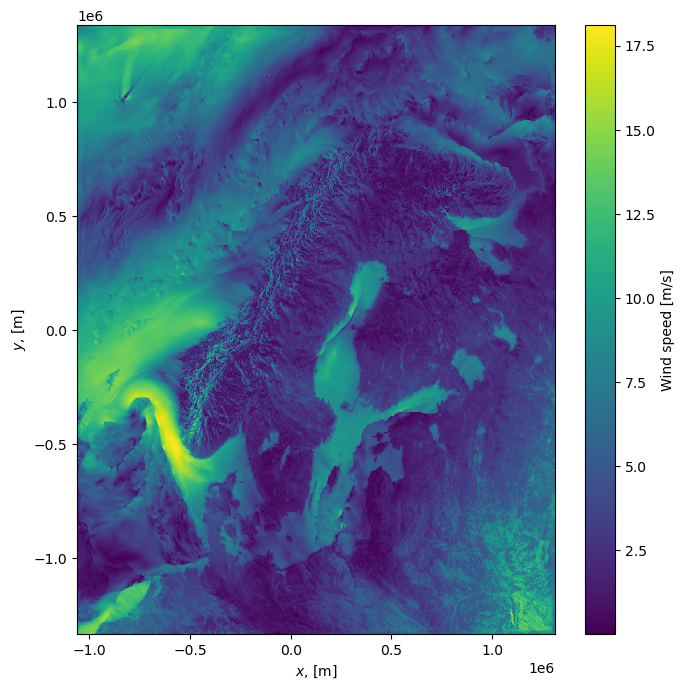

In [20]:
speed = np.sqrt(d.x_wind_10m[0,0,0,:,:]**2 + d.y_wind_10m[0,0,0,:,:]**2)

fig = plt.figure(figsize=(7,7))
plt.pcolormesh(d.x, d.y, speed, shading='auto')
plt.colorbar(label='Wind speed [m/s]')
plt.xlabel('$x$, [m]')
plt.ylabel('$y$, [m]')
plt.tight_layout()

## Examples of atmospheric applications of stochastic transport modelling

Just a couple of examples, from very large to very small scales


### Methane
Modelling transport and distribution of methane in the atmosphere can be useful in a climate perspective
* https://www.nilu.com/2022/09/methane-leaks-from-nord-stream-a-serious-pollution-event/
* https://gmd.copernicus.org/articles/11/4469/2018/

### NOx
Nitrous oxides from combustion (traffic, fires)
* https://acp.copernicus.org/articles/3/387/2003/acp-3-387-2003.pdf
* https://doi.org/10.1016/j.atmosenv.2015.12.052

### Corona virus in indoor ventilation
* https://doi.org/10.1080/10618562.2021.1991328
* https://doi.org/10.1061/(ASCE)EE.1943-7870.0001870